## EDA on Yellow taxi for October 2016 using Dask

### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import os
import dask
import dask.dataframe as dd
import dask.array as da
from glob import glob
import graphviz

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from dask.distributed import Client,progress,LocalCluster
#client = Client(n_workers=2, threads_per_worker=1, memory_limit='3GB',host='localhost',processes=True)
#client

### Defining local cluster and initiating Client

In [4]:
cluster = LocalCluster('127.0.0.1:8787',
        n_workers=2, 
        threads_per_worker=1,
        memory_limit='3GB',
        interface='lo' 
    )

client = Client(cluster)

client

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP st

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 5.59 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:49874,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 5.59 GiB
Comm: tcp://127.0.0.1:49884,Total threads: 1
Dashboard: http://127.0.0.1:49885/status,Memory: 2.79 GiB
Nanny: tcp://127.0.0.1:49878,


In [5]:
'''
%%time
filenames= glob(os.path.join("yellow_taxi_oct-dec-2016","yellow_*.csv"))
All_data = []
for i in filenames:
    df=dd.read_csv(i,dtype={'mta_tax': 'float64'})
    All_data.append(df)
    
df_file=dd.concat(All_data, axis=0, ignore_index=True)
df_file
'''

'\n%%time\nfilenames= glob(os.path.join("yellow_taxi_oct-dec-2016","yellow_*.csv"))\nAll_data = []\nfor i in filenames:\n    df=dd.read_csv(i,dtype={\'mta_tax\': \'float64\'})\n    All_data.append(df)\n    \ndf_file=dd.concat(All_data, axis=0, ignore_index=True)\ndf_file\n'

### Importing CSV file

In [6]:
%%time
df = dd.read_csv("yellow_tripdata_2016-10.csv",dtype={'mta_tax': 'float64'})

CPU times: user 31.2 ms, sys: 46.9 ms, total: 78.1 ms
Wall time: 718 ms


In [7]:
df.head()

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


VendorID  tpep_pickup_datetime  \
1 2016-10-01 00:00:00  2016-10-01 00:10:45                     3   
2 2016-10-01 00:00:00  2016-10-01 00:15:51                     5   
  2016-10-01 00:00:00  2016-10-01 00:03:22                     5   
  2016-10-01 00:00:00  2016-10-01 00:15:35                     4   
  2016-10-01 00:00:00  2016-10-01 00:14:33                     2   

                       tpep_dropoff_datetime  passenger_count trip_distance  \
1 2016-10-01 00:00:00                   3.40                1             N   
2 2016-10-01 00:00:00                   4.17                1             N   
  2016-10-01 00:00:00                   0.66                1             N   
  2016-10-01 00:00:00                   2.49                1             N   
  2016-10-01 00:00:00                   3.81                1             N   

                       RatecodeID  store_and_fwd_flag  PULocationID  \
1 2016-10-01 00:00:00          80                  33             1   
2 2016-10-01 00:00:00         262                 107             1   
  2016-10-01 00:00:00         163                 230             2   
  2016-10-01 00:00:00         114                 100             2   
  2016-10-01 00:00:00          87                 158             2   

                       DOLocationID  payment_type  fare_amount  extra  \
1 2016-10-01 00:00:00          13.0           0.5          0.5   3.55   
2 2016-10-01 00:00:00          15.0           0.5          0.5   2.00   
  2016-10-01 00:00:00           4.5           0.5          0.5   0.00   
  2016-10-01 00:00:00          12.0           0.5          0.5   0.00   
  2016-10-01 00:00:00          14.5           0.5          0.5   0.00   

                       mta_tax  tip_amount  tolls_amount  \
1 2016-10-01 00:00:00      0.0         0.3         17.85   
2 2016-10-01 00:00:00      0.0         0.3         18.30   
  2016-10-01 00:00:00      0.0         0.3          5.80   
  2016-10-01 00:00:00      0.0         0.3         13.30   
  2016-10-01 00:00:00      0.0         0.3         15.80   

                       improvement_surcharge  total_amount  
1 2016-10-01 00:00:00                    NaN           NaN  
2 2016-10-01 00:00:00                    NaN           NaN  
  2016-10-01 00:00:00                    NaN           NaN  
  2016-10-01 00:00:00                    NaN           NaN  
  2016-10-01 00:00:00                    NaN           NaN

### Resetting index

In [8]:
df = df.reset_index()
df.compute()

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


,level_0,level_1,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-10-01 00:00:00,2016-10-01 00:10:45,3,3.40,1,N,80,33,1,13.0,0.5,0.5,3.55,0.0,0.3,17.85,NaN,NaN
1,2,2016-10-01 00:00:00,2016-10-01 00:15:51,5,4.17,1,N,262,107,1,15.0,0.5,0.5,2.00,0.0,0.3,18.30,NaN,NaN
2,2,2016-10-01 00:00:00,2016-10-01 00:03:22,5,0.66,1,N,163,230,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
3,2,2016-10-01 00:00:00,2016-10-01 00:15:35,4,2.49,1,N,114,100,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30,NaN,NaN
4,2,2016-10-01 00:00:00,2016-10-01 00:14:33,2,3.81,1,N,87,158,2,14.5,0.5,0.5,0.00,0.0,0.3,15.80,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723279,1,2016-10-30 00:35:30,2016-10-30 00:48:57,1,2.00,1,Y,224,186,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80,NaN,NaN
723280,1,2016-10-30 00:51:01,2016-10-30 01:20:32,1,2.80,1,Y,186,79,2,18.5,0.5,0.5,0.00,0.0,0.3,19.80,NaN,NaN
723281,1,2016-10-30 01:42:36,2016-10-30 01:57:43,1,3.90,1,Y,148,229,2,14.5,0.5,0.5,0.00,0.0,0.3,15.80,NaN,NaN
723282,1,2016-10-30 02:05:20,2016-10-30 02:16:12,1,4.60,1,Y,137,88,2,15.5,0.5,0.5,0.00,0.0,0.3,16.80,NaN,NaN


### Analysing the dataset

In [9]:
#columns in the dask dataframe
df.columns

Index(['level_0', 'level_1', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [10]:
#no: of columns in the dataframe
len(df.columns)

19

In [11]:
df.shape

(Delayed('int-b78a3f01-92d1-4e13-b71d-a0f6199ca408'), 19)

In [12]:
#computing the shape of the dask dataframe
df['VendorID'].compute().shape

(10854626,)

In [13]:
df.describe()

,level_0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
npartitions=1,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Analysing the statistics of the dataframe

In [14]:
df.compute().describe()

,level_0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.085463e+07,1.085463e+07,1.085463e+07,1.085463e+07,1.085463e+07,1.085463e+07,1.085463e+07,1.085463e+07,1.085463e+07,1.085463e+07,1.085463e+07,1.085463e+07,1.085463e+07,1.085463e+07,0.0,0.0
mean,1.535699e+00,1.646551e+00,5.495644e+00,1.044006e+00,1.625055e+02,1.603950e+02,1.350458e+00,1.339626e+01,3.208789e-01,4.973066e-01,1.820750e+00,3.174188e-01,2.996705e-01,1.665658e+01,NaN,NaN
std,4.987240e-01,1.286227e+00,4.048260e+03,5.211814e-01,6.706557e+01,7.079475e+01,4.952769e-01,1.409662e+02,4.450296e-01,6.122826e-02,2.667531e+00,1.688029e+00,1.340672e-02,1.412119e+02,NaN,NaN
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.000000e+02,-4.500000e+00,-5.000000e-01,-5.500000e+01,-1.108000e+01,-3.000000e-01,-4.003000e+02,NaN,NaN
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.760000e+00,NaN,NaN
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,0.000000e+00,5.000000e-01,1.290000e+00,0.000000e+00,3.000000e-01,1.230000e+01,NaN,NaN
75%,2.000000e+00,2.000000e+00,3.200000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.836000e+01,NaN,NaN
max,2.000000e+00,9.000000e+00,1.008332e+07,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.791709e+05,3.315000e+01,5.384000e+01,9.999900e+02,9.130000e+02,3.000000e-01,3.791837e+05,NaN,NaN


### Analysing the missing values in the dataframe

In [15]:
missing_values = df.isnull().sum()
missing_values.compute()

level_0                         0
level_1                         0
VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count                 0
trip_distance                   0
RatecodeID                      0
store_and_fwd_flag              0
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge    10854626
total_amount             10854626
dtype: int64

### calculating the percentage of missing values

In [16]:
missing_count = ((missing_values / df.index.size) * 100)
missing_count_pct = missing_count.compute()
missing_count_pct

level_0                    0.0
level_1                    0.0
VendorID                   0.0
tpep_pickup_datetime       0.0
tpep_dropoff_datetime      0.0
passenger_count            0.0
trip_distance              0.0
RatecodeID                 0.0
store_and_fwd_flag         0.0
PULocationID               0.0
DOLocationID               0.0
payment_type               0.0
fare_amount                0.0
extra                      0.0
mta_tax                    0.0
tip_amount                 0.0
tolls_amount               0.0
improvement_surcharge    100.0
total_amount             100.0
dtype: float64

### dropping columns having more than 50% of missing values and columns that are unnecessary for EDA

In [17]:
columns_to_drop = missing_count_pct[missing_count_pct > 50].index
columns_to_drop

Index(['improvement_surcharge', 'total_amount'], dtype='object')

In [18]:
df = df.drop(['improvement_surcharge', 'total_amount','level_0','level_1'],axis=1)
df.compute()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount
0,2016-10-01 00:10:45,3,3.40,1,N,80,33,1,13.0,0.5,0.5,3.55,0.0,0.3,17.85
1,2016-10-01 00:15:51,5,4.17,1,N,262,107,1,15.0,0.5,0.5,2.00,0.0,0.3,18.30
2,2016-10-01 00:03:22,5,0.66,1,N,163,230,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
3,2016-10-01 00:15:35,4,2.49,1,N,114,100,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30
4,2016-10-01 00:14:33,2,3.81,1,N,87,158,2,14.5,0.5,0.5,0.00,0.0,0.3,15.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723279,2016-10-30 00:48:57,1,2.00,1,Y,224,186,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80
723280,2016-10-30 01:20:32,1,2.80,1,Y,186,79,2,18.5,0.5,0.5,0.00,0.0,0.3,19.80
723281,2016-10-30 01:57:43,1,3.90,1,Y,148,229,2,14.5,0.5,0.5,0.00,0.0,0.3,15.80
723282,2016-10-30 02:16:12,1,4.60,1,Y,137,88,2,15.5,0.5,0.5,0.00,0.0,0.3,16.80


### printing the data types of all the columns

In [19]:
df.dtypes

VendorID                  object
tpep_pickup_datetime       int64
tpep_dropoff_datetime    float64
passenger_count            int64
trip_distance             object
RatecodeID                 int64
store_and_fwd_flag         int64
PULocationID               int64
DOLocationID             float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
dtype: object

### creating a new column called date and converting datetime 

In [20]:
df['Date'] = dd.to_datetime(df['VendorID']).dt.date
df['Date'].astype('datetime64').compute()

0        2016-10-01
1        2016-10-01
2        2016-10-01
3        2016-10-01
4        2016-10-01
            ...    
723279   2016-10-30
723280   2016-10-30
723281   2016-10-30
723282   2016-10-30
723283   2016-10-30
Name: Date, Length: 10854626, dtype: datetime64[ns]

In [21]:
# no: of columns after deleting the unnecessary columns
len(df.columns)

16

In [22]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'Date'],
      dtype='object')

### Graphically visualizing dask dataframe

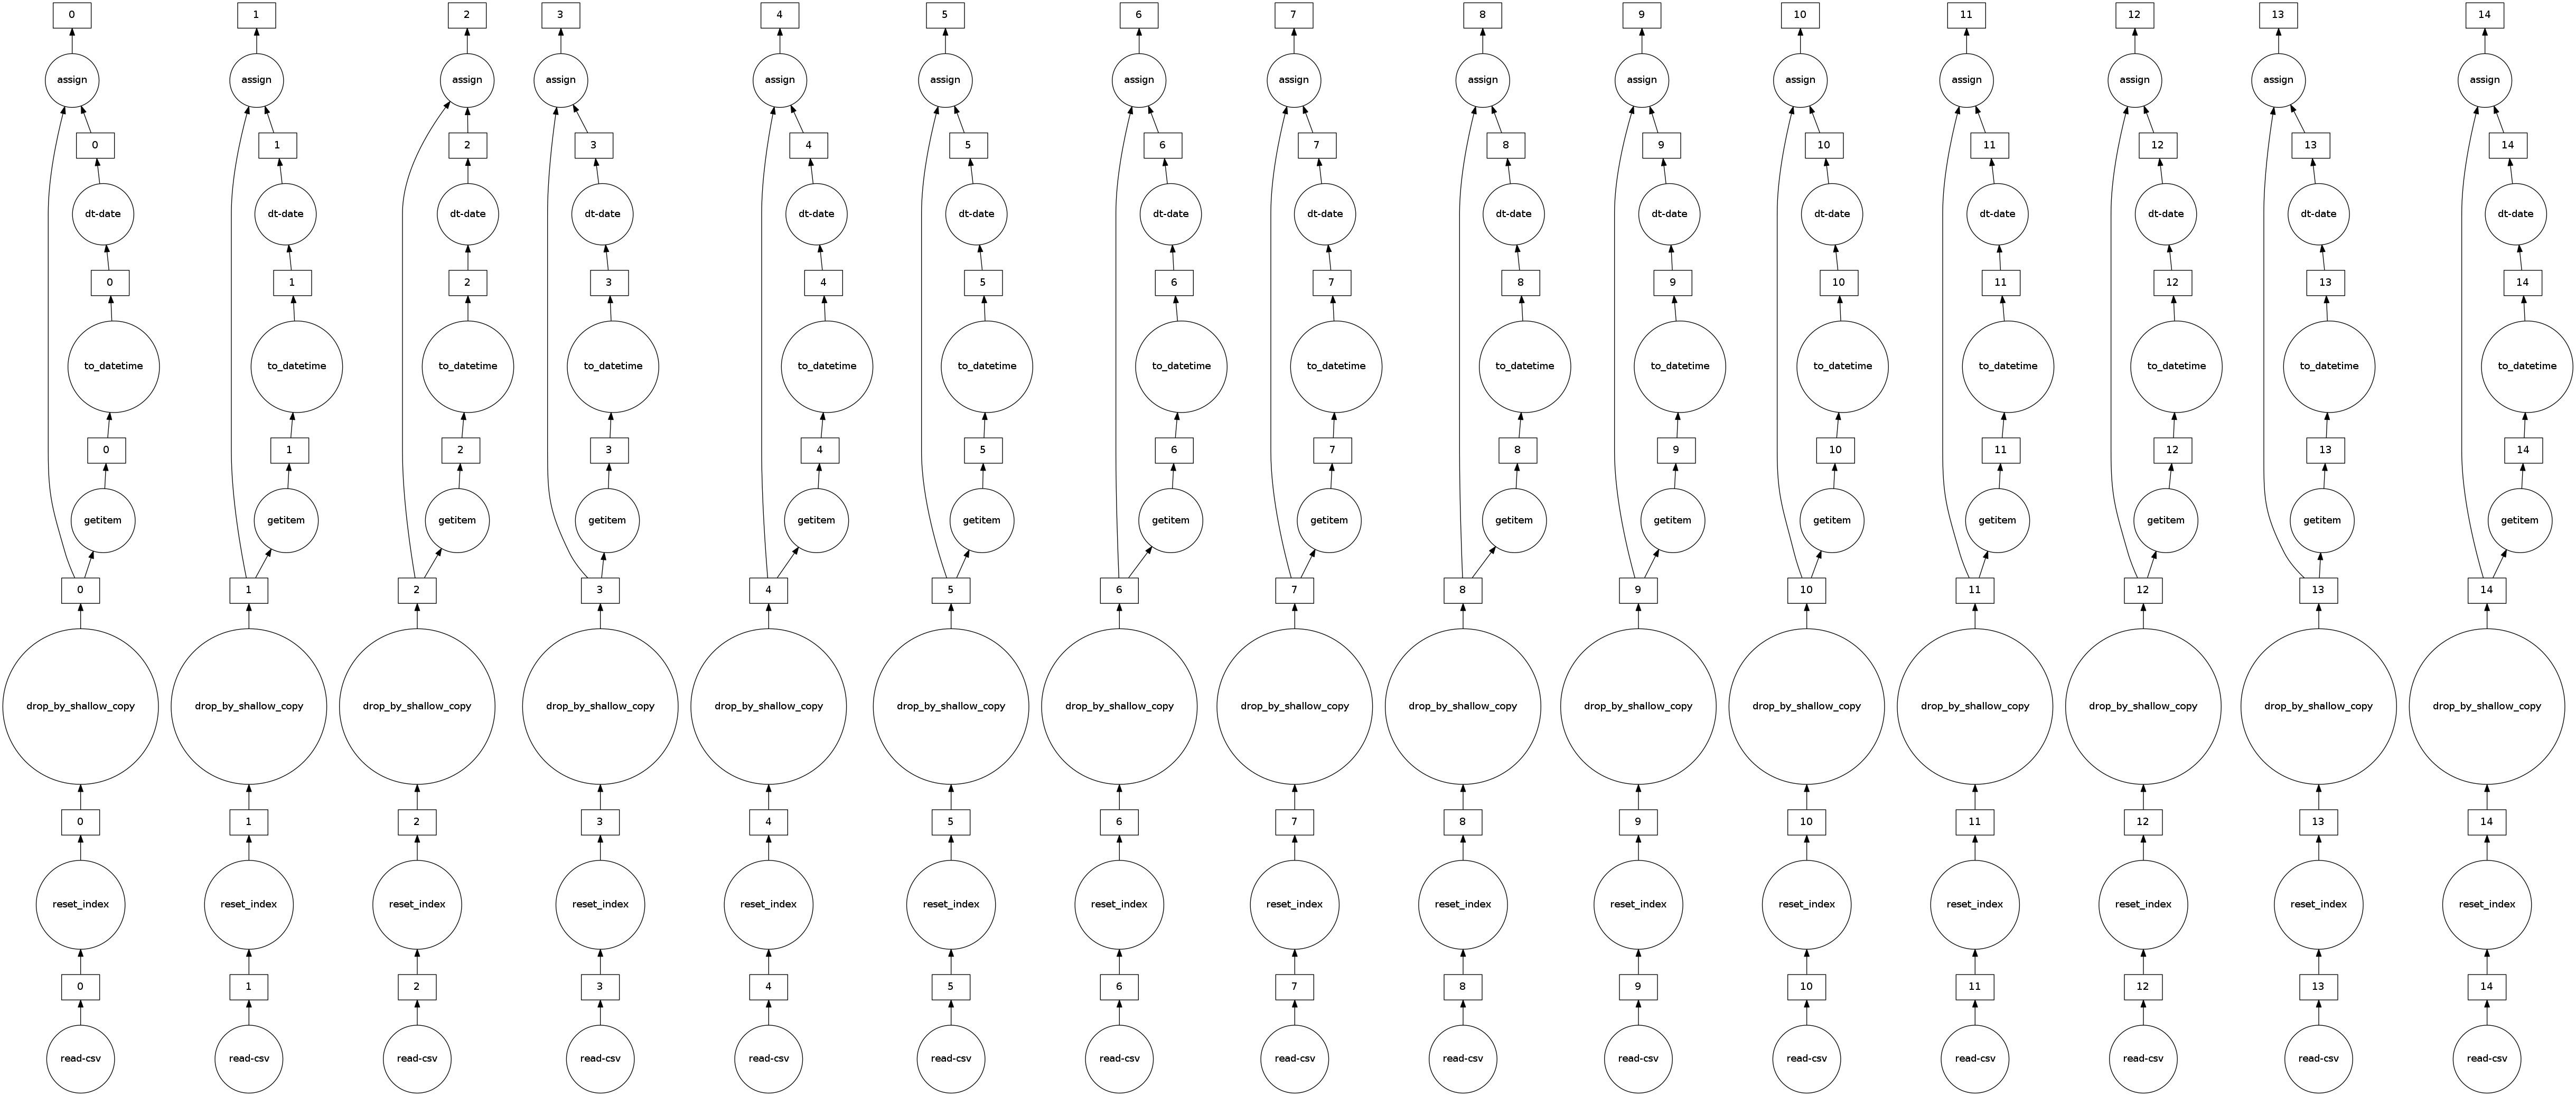

In [23]:
df.visualize()

### saving the final dask dataframe to the memory

In [24]:
%%time
df_dask = df.persist()

CPU times: user 46.9 ms, sys: 0 ns, total: 46.9 ms
Wall time: 135 ms


### Number of payment types available

In [25]:
payment_types = df_dask['payment_type'].value_counts()
payment_types.compute()

 0.00     5738970
 0.50     3553939
 1.00     1516994
 4.50       42345
-0.50        1652
-1.00         599
-4.50          60
 5.50          14
 1.50          10
 0.02          10
 0.30           4
-0.45           3
 5.00           2
 3.00           2
 2.20           2
 2.00           2
 4.54           2
 0.95           2
 0.70           2
 0.20           2
 1.80           1
 0.80           1
 0.45           1
 4.00           1
 0.11           1
 0.05           1
-0.35           1
 10.24          1
 20.20          1
 33.15          1
Name: payment_type, dtype: int64

### Graphically visualizing value counts operation

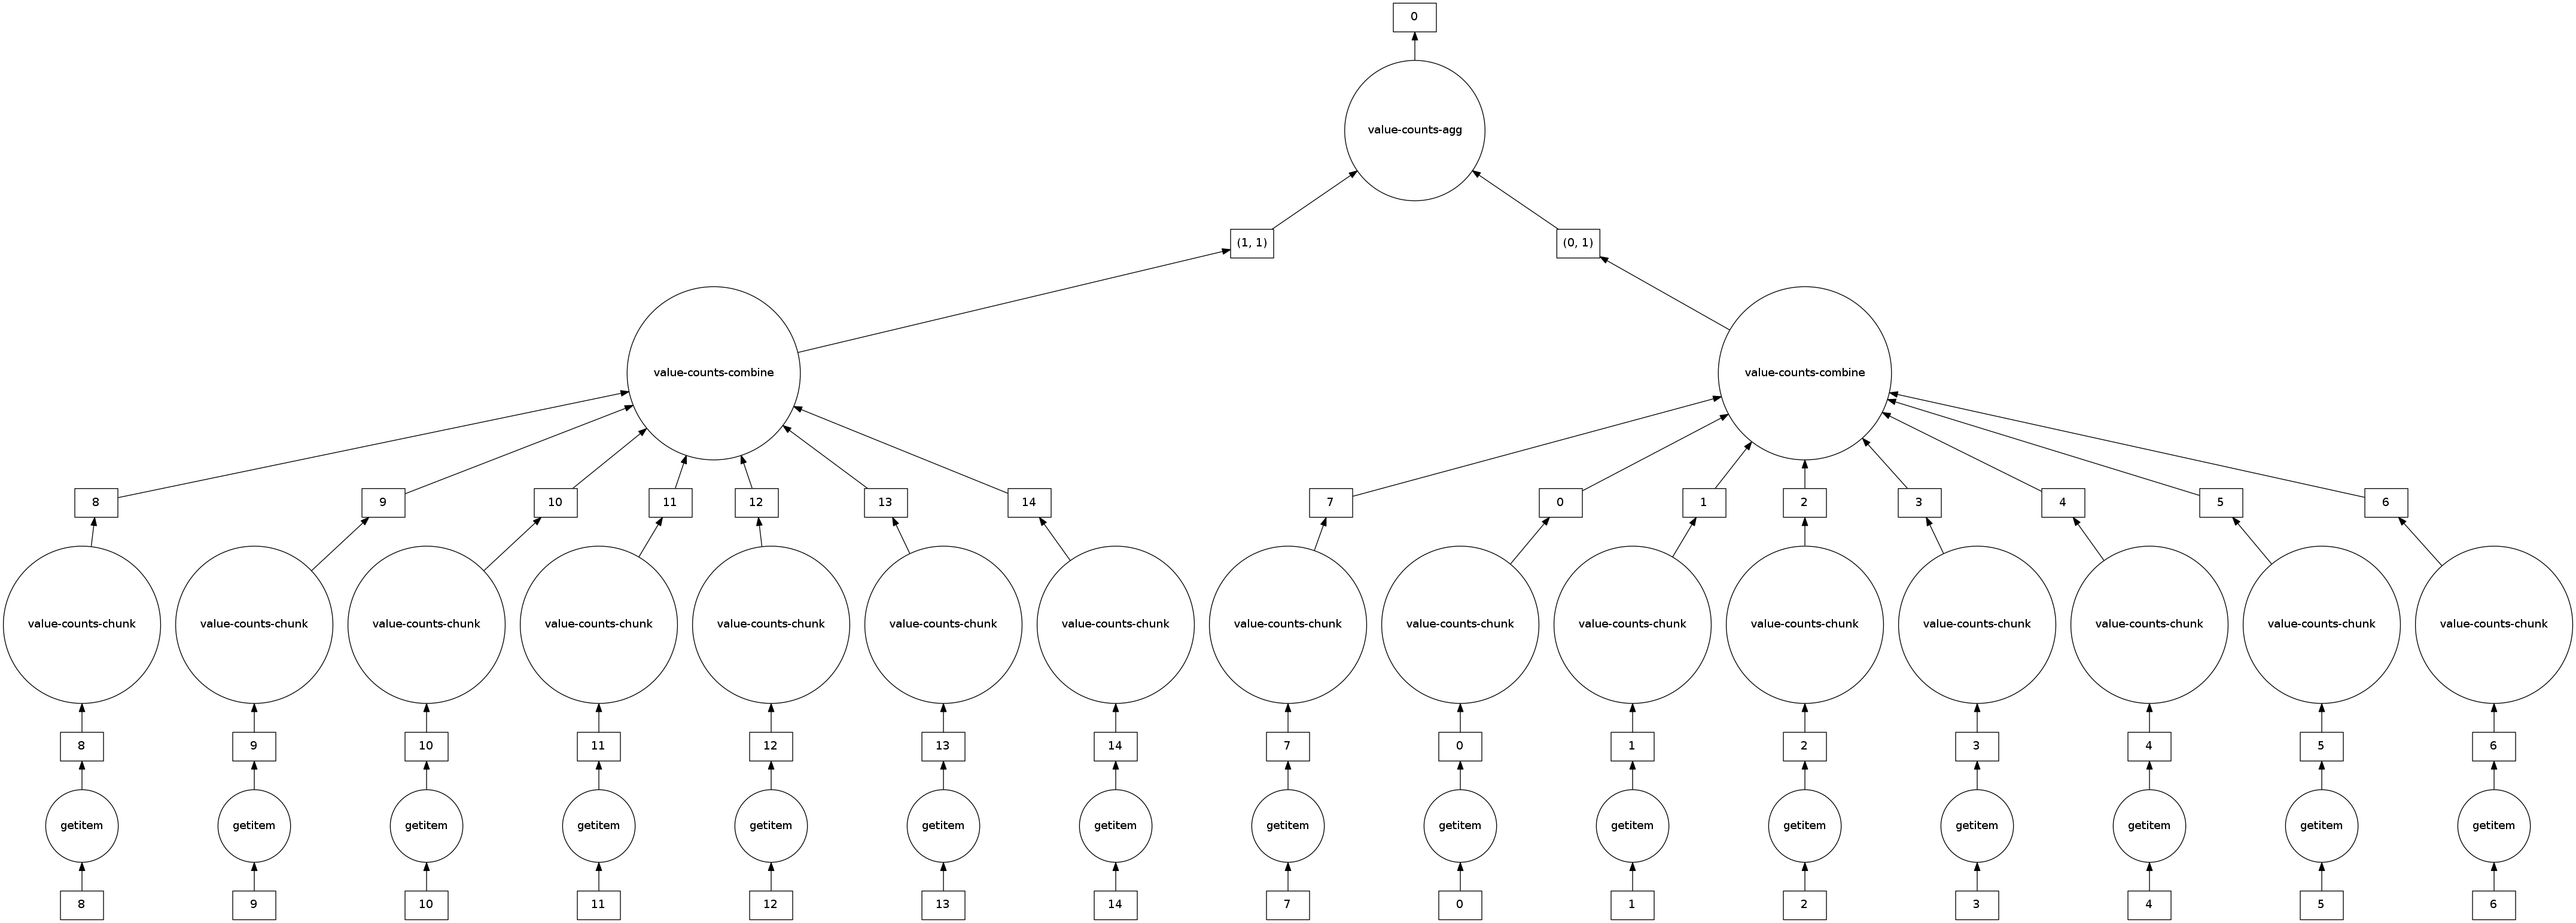

In [26]:
payment_types.visualize()

### Average passenger count according to pick up locations

In [27]:
df_dask.groupby(['PULocationID']).passenger_count.agg('mean').round(2).compute()

PULocationID
1    1.05
2    1.03
3    1.32
4    1.19
5    3.00
Name: passenger_count, dtype: float64

### Average passenger count according to drop off location

In [28]:
df_dask.groupby(['DOLocationID']).passenger_count.agg('mean').round(2).compute()

DOLocationID
-161.00       5.0
-150.00       5.0
-96.80        5.0
-80.00        5.0
-72.00        5.0
             ... 
 400.50       5.0
 493.00       5.0
 528.05       5.0
 700.00       5.0
 10150.92    99.0
Name: passenger_count, Length: 1844, dtype: float64

### Creating a new column called total fare which is the sum of all the fares and aggregating it to find out October's revenue

In [29]:
df_dask['total_fare'] = df_dask['fare_amount'] + df_dask['extra'] + df_dask['mta_tax'] + df_dask['tip_amount'] + df_dask['tolls_amount']
Total_sum_oct = df_dask['total_fare'].sum()
Total_sum_oct= Total_sum_oct.compute()
print('The total revenue from yellow taxi in the month of october is %.2f' %Total_sum_oct)

The total revenue from yellow taxi in the month of october is 212660910.71


### Analysing the toll amount collected for the month of October from yellow taxi drivers

In [30]:
average = df_dask['tolls_amount'].mean()
maximum_amt = df_dask['tolls_amount'].max()
min_amt = df_dask['tolls_amount'].min()
average,maximum_amt,min_amt = dask.compute(average,maximum_amt,min_amt)
print('The average toll amount is %.2f,the maximum amount collected is %.2f and the minimum amount is %.2f' %(average,maximum_amt,min_amt))

The average toll amount is 16.66,the maximum amount collected is 379183.74 and the minimum amount is -400.30


### The below plot shows the total fare from yellow taxi for the october month. The data shows an entry for sep 25 2016 and Nov 01 which are to be treated as outlier. Highest fare was calcluted on 14th October and lowest fare was collected on 3rd October

<AxesSubplot:xlabel='Date'>

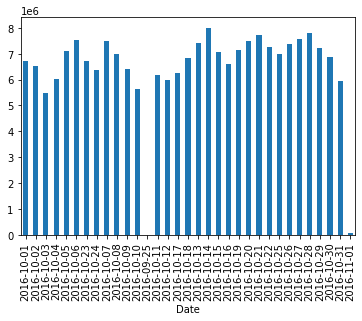

In [31]:
df_dask.groupby(['Date']).total_fare.sum().compute().plot(kind='bar')

### The below plot shows the trend in mta tax and fare amount charged in the month of October. Mta tax varies greatly with time but fare in yellow taxi cabs are constant over the month.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


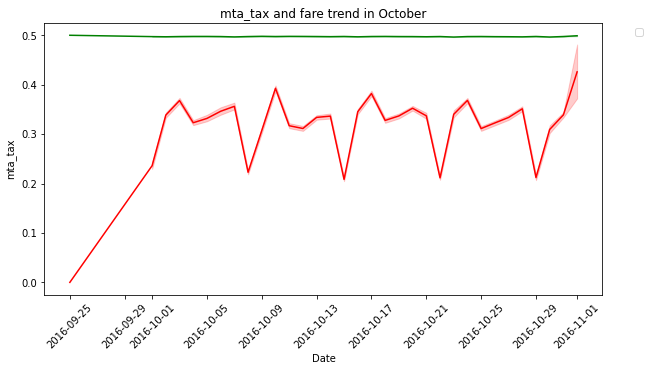

In [40]:
fig, ax = plt.subplots(figsize=(10,5),ncols=1)
sns.lineplot(x='Date', y='mta_tax', data=df_dask, color="red").set(title='mta_tax and fare trend in October')
sns.lineplot(x='Date', y='fare_amount', data=df_dask, color="green")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


### Restarting the client and clearing all the memory

In [41]:
%%time
client.restart()

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.nanny - WARNING - Worker process still alive after 1.599997901916504 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 1.599997329711914 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.9999973297119142 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 3.999983787536621 seconds, killing


CPU times: user 125 ms, sys: 1.31 s, total: 1.44 s
Wall time: 25.1 s


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:49874,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: 1 hour ago,Total memory: 0 B


### Profile of the dask client

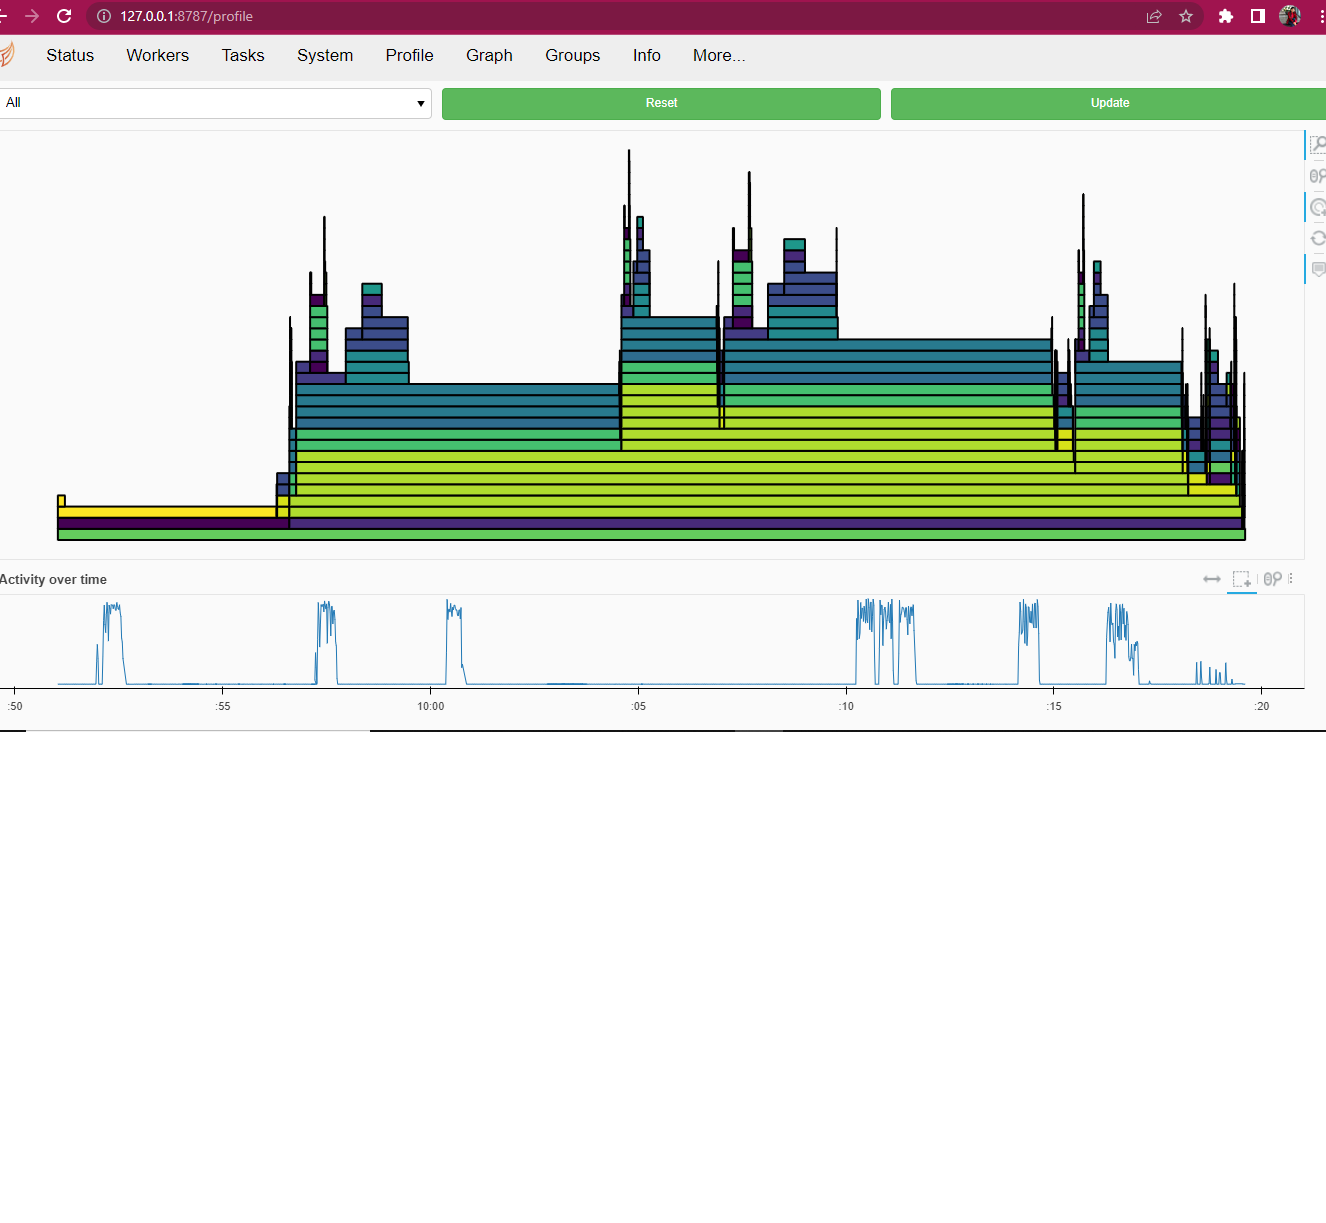

### Screenshot of DAG graph during execution of program (section 1.17) 
* Note: This was taken before using dask.persist to save the dataframe in memory.
* Dask.persist helped saved computation time since the dataframe was already in memory and dask need not compute the dataframe again

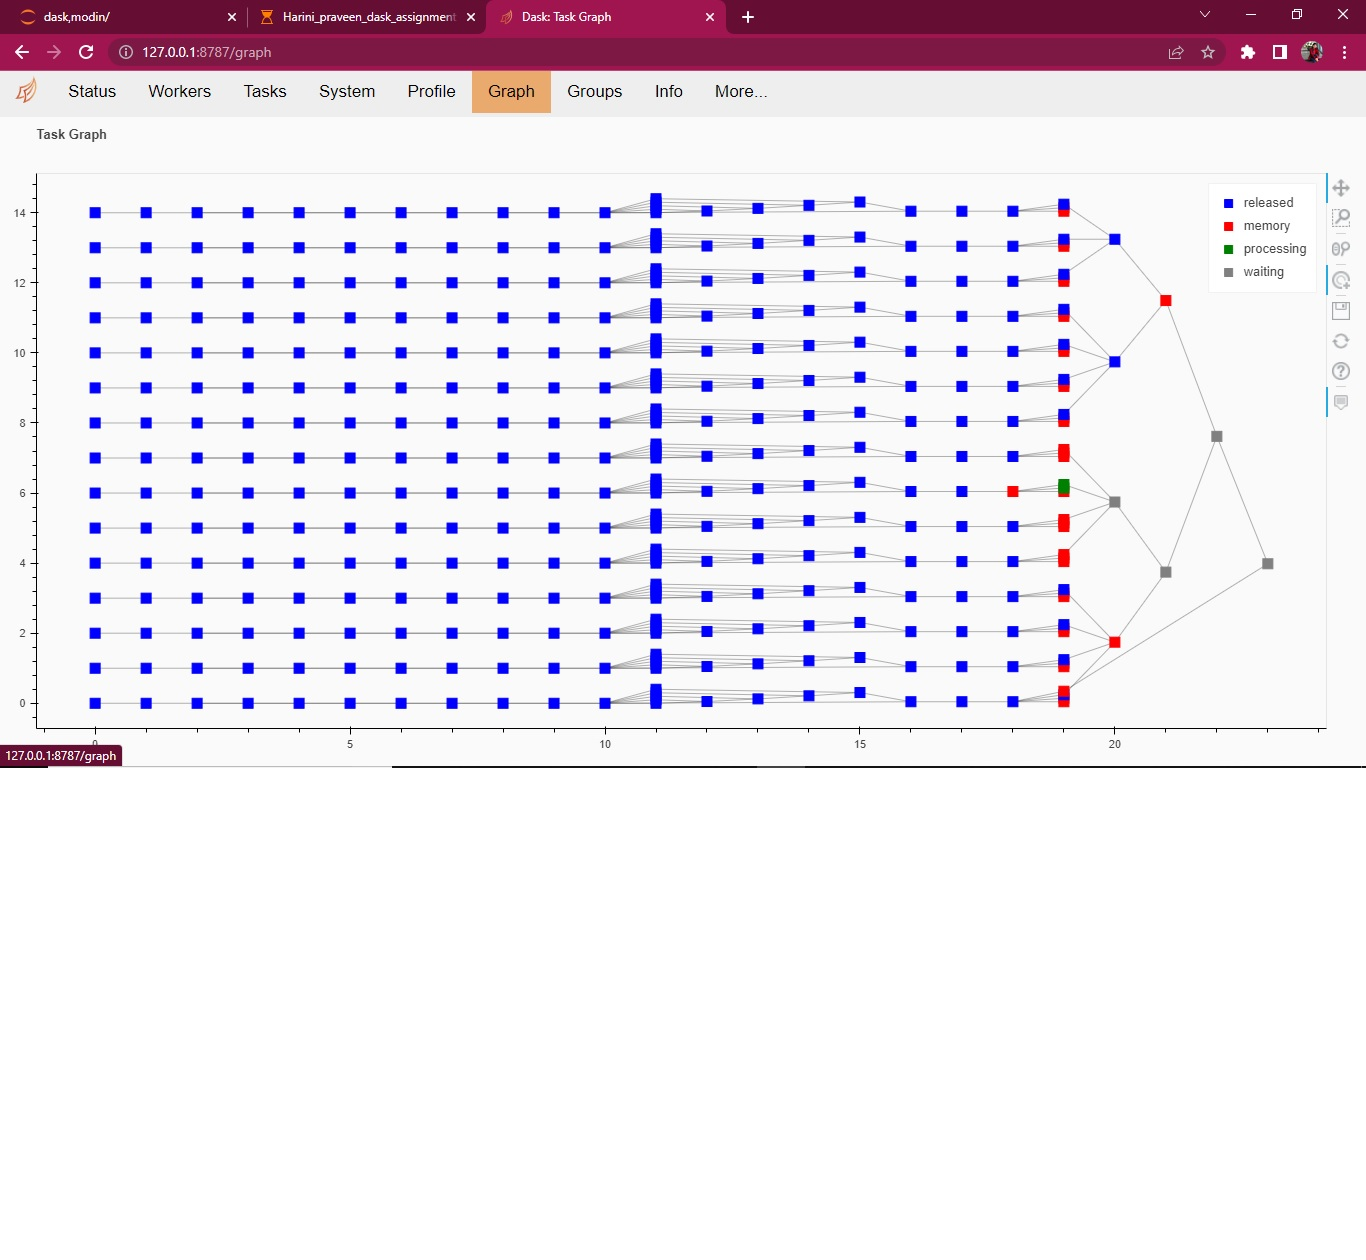